# Applied Machine Learning: Assignment \#4

### Sheetal Parikh
EN.605.631.81<br>
February 22, 2021
***
***

*Generally a parameter selection procedure might be necessary to evaluate Probability of Detection versus Probability of False Alarm (i.e. Pd versus Pf) in order to make a decision about a classifier selection and or hyper parameter tuning for a classifier.  In this assignment we will produce an ROC plot presenting operating points of various classifiers and their varying parameters so that we can make a justifiable operating classifier/parameter selection for the following problem.
Classification of mushrooms, edible or poisonous. Download the assignment04_mushroom_dataset.csv dataset file from the module content. Load the data set in your model development framework, examine the features to see they are all nominal
features. The first column is the class which represents the mushroom is poisonous or not.  Apply necessary pre-processing such as nominal to numerical conversions.  Make sure sanity check the pipeline and perhaps run your favorite baseline classifier first.*


## Problem 1

*By using at least 4 classifiers and 5 different hyper-parameter settings for each, generate operating points and plot them on ROC. Do not hesitate to use/modify the ROC plot code in the module notebook. In case you do not see enough variety in Pd-Pf you might need to work on the classifiers set and/or hyper parameters. And do not hesitate to try hundreds if necessary, since the ROC is just a natural scatter plot. (Recommend linear SVM, RBF SVM, logistic regression, random forest, etc.)*

In [1]:
# imports for notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import os 

#checking current directory
#print(os.getcwd() + "\n")

# change the current directory 
# to specified directory 
os.chdir(r"C:\Users\Sheetal\Documents\Sheetal") 

#Read in file
relative_path = 'datasets/assignment04_mushroom_dataset.csv'
#df = pd.DataFrame()
df = pd.read_csv(relative_path)

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')

#print first few rows to visualize dataset
df.head()


N rows=8124, M columns=23


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The class column will be the target variable.  Mushrooms can either be classified as poisonous(p) or edible(e).

In [2]:
# Print some info about datatypes of dataset
print(df.dtypes)

print("")
print(f'Column Names:')

#printing column names
print(df.columns)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Column Names:
Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape',

All the variables are objects and will need to be converted to numeric.  Also, we can see under column name, the habitat column has extra spaces.

In [3]:
#renaming habitat to remove spaces in column name
df.rename(columns = {'habitat    ':'habitat'}, inplace = True) 

#checking for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values. We need to still check if there are any duplicates.

In [4]:
#code from Module 3 notebook
# Check for duplicates, this adds a new column to the dataset
df["is_duplicate"]= df.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df)}")
print(f"#duplicated= {len(df[df['is_duplicate']==True])}")

#seeing how column was added
df.head()

#total= 8124
#duplicated= 0


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,is_duplicate
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,False
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,False
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,False
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,False
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,False


In [ ]:
#code from Module 3 notebook
# Removing the duplicate marker column
df.drop(columns='is_duplicate', inplace=True)
print(f'#total= {len(df)}')

#seeing whether column was removed
df.head()

There are no duplicates in the dataset.  We can take a look at a summary of each variable.  

In [5]:
#summary of attributes
print(df.describe().transpose())

                         count unique    top  freq
class                     8124      2      e  4208
cap-shape                 8124      6      x  3656
cap-surface               8124      4      y  3244
cap-color                 8124     10      n  2284
bruises                   8124      2      f  4748
odor                      8124      9      n  3528
gill-attachment           8124      2      f  7914
gill-spacing              8124      2      c  6812
gill-size                 8124      2      b  5612
gill-color                8124     12      b  1728
stalk-shape               8124      2      t  4608
stalk-root                8124      5      b  3776
stalk-surface-above-ring  8124      4      s  5176
stalk-surface-below-ring  8124      4      s  4936
stalk-color-above-ring    8124      9      w  4464
stalk-color-below-ring    8124      9      w  4384
veil-type                 8124      1      p  8124
veil-color                8124      4      w  7924
ring-number               8124 

The veil-type variable consists of only one unique value, p. This can mean that all the mushrooms have the same veil type and so this variable won't help distinguish between edible or poisonous mushrooms.  We can remove this column. Also, we see that the following variables are binary: class, bruises, gill-attachment, gill-spacing, gill-size and stalk-shape.

In [6]:
#removing veil-type
df2 = df.copy()
df2.drop(columns='veil-type', inplace=True)

#printing new dataset
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,is_duplicate
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,w,o,p,k,s,u,False
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,w,o,p,n,n,g,False
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,w,o,p,n,n,m,False
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,w,o,p,k,s,u,False
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,w,o,e,n,a,g,False


In [7]:
#printing updated dataset shape

print("Dataset updated shape:", df2.shape)

Dataset updated shape: (8124, 23)


After removing the veil-type variable we have 8124 instances and 22 variables 

In [8]:
# Determining whether we have a balanced dataset
breakdown = df2['class'].value_counts()
print(breakdown)

e    4208
p    3916
Name: class, dtype: int64


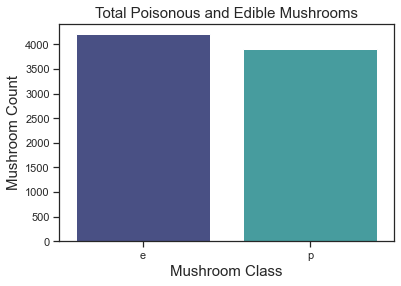

In [9]:
sns.barplot(x=breakdown.index, y=breakdown.values, data=df2, palette = "mako")
plt.ylabel('Mushroom Count', fontsize = 15)
plt.xlabel('Mushroom Class', fontsize = 15)
plt.title('Total Poisonous and Edible Mushrooms', fontsize = 15)
plt.show()

We can see above the we have a fairly balanced dataset of poisonous and edible mushrooms. We need to convert each variable to be a numerical value.

In [10]:
#converting to numerical data

#one hot coding formula from module 3 notebook
# pandas get_dummies function is one-hot-encoder
def encode_onehot(_df, f):
    _df2 = pd.get_dummies(_df[f], prefix='', prefix_sep='').max(level=0, axis=1).add_prefix(f+' - ')
    df3 = pd.concat([_df, _df2], axis=1)
    df3 = df3.drop([f], axis=1)
    return df3

# one-hot-encodeing all columns except those with 2 unique variables - class, bruises, gill-attachment, gill-spacing, 
#gill-size, stalk-shape

# for mushroom class (dep. var.)
df_o = df2.copy()

#one-shot encode all columns except those that are binary
for col in df_o.columns:
    
    if col == 'class':
        continue
    if col == 'bruises':
        continue
    if col == 'gill-attachment':
        continue
    if col == 'gill-spacing':
        continue
    if col == 'gill-size':
        continue
    if col == 'stalk-shape':
        continue
    df_o = encode_onehot(df_o, col)
    
#using LabelEncoder to convert binary variables to numerical to prevent having extra columns
labelencoder = LabelEncoder()    
    
df_le = df_o.copy()

# Removing columns that will be labelencoded from dataset - will have 106 columns
df_o.drop(columns = ['class','bruises','gill-attachment','gill-spacing','gill-size','stalk-shape'], axis = 1, inplace=True)  

#label encoding binary variables; this dataset will include only the 6 variables being converted - will have 6 columns
df_le = df_le[['class','bruises','gill-attachment','gill-spacing','gill-size','stalk-shape']].apply(labelencoder.fit_transform)

#combining datset dataset with 106 columns with the new dataset with 6 columns
df2_o = pd.concat([df_le, df_o], axis=1)

#printing resulting dataset - 112 columns
print("Dataset updated shape:", df2_o.shape)

print("")

df2_o.head()

Dataset updated shape: (8124, 113)



,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape - b,cap-shape - c,cap-shape - f,cap-shape - k,...,population - v,population - y,habitat - d,habitat - g,habitat - l,habitat - m,habitat - p,habitat - u,habitat - w,is_duplicate - False
0,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


All variables were one-hot encoded except the 6 variables that are binary(class, bruises, gill-attachment, gill-spacing, gill-size, and stalk shape).  

In [11]:
corr = df2_o.corr()
corr

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape - b,cap-shape - c,cap-shape - f,cap-shape - k,...,population - v,population - y,habitat - d,habitat - g,habitat - l,habitat - m,habitat - p,habitat - u,habitat - w,is_duplicate - False
class,1.000000,-0.501530,0.129200,-0.348387,0.540024,-0.102019,-0.182567,0.023007,0.018526,0.163565,...,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087,NaN
bruises,-0.501530,1.000000,0.137359,-0.299473,-0.369596,0.099364,0.115686,0.003803,0.045188,-0.229578,...,-0.179268,0.162030,0.264457,-0.131746,-0.278238,0.228986,-0.249460,0.143017,0.184507,NaN
gill-attachment,0.129200,0.137359,1.000000,0.071489,0.108984,0.186485,-0.122896,0.003615,0.043740,-0.083575,...,0.013080,0.084172,0.100905,0.097662,-0.436199,0.031453,0.065947,0.035483,0.025344,NaN
gill-spacing,-0.348387,-0.299473,0.071489,1.000000,-0.108333,0.080895,0.039406,0.050573,-0.039154,-0.019591,...,-0.308043,-0.226770,-0.217237,0.537841,-0.077632,-0.084739,-0.177670,-0.095595,-0.068279,NaN
gill-size,0.540024,-0.369596,0.108984,-0.108333,1.000000,0.214576,-0.148449,0.033174,-0.075766,0.306333,...,0.506475,-0.298685,-0.016064,-0.323808,0.336217,-0.129183,0.170190,0.141152,-0.104090,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat - m,-0.138627,0.228986,0.031453,-0.084739,-0.129183,-0.221048,0.374316,-0.004286,-0.129312,-0.065047,...,-0.144434,-0.099772,-0.153579,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,NaN
habitat - p,0.323346,-0.249460,0.065947,-0.177670,0.170190,-0.052059,-0.095178,-0.008985,0.021891,0.090538,...,0.169228,0.040714,-0.322005,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,NaN
habitat - u,0.112078,0.143017,0.035483,-0.095595,0.141152,-0.077334,-0.052871,-0.004835,0.030636,-0.073380,...,0.001180,-0.042888,-0.173254,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,NaN
habitat - w,-0.150087,0.184507,0.025344,-0.068279,-0.104090,-0.178111,-0.037764,-0.003453,-0.017450,0.119003,...,-0.154742,-0.080392,-0.123748,-0.093276,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,NaN


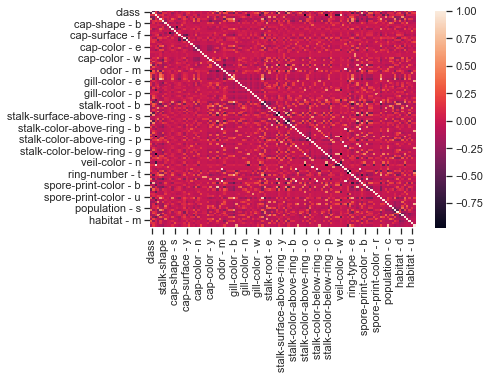

In [12]:
# plotting correlation heatmap 
dataplot=sns.heatmap(df2_o.corr()) 
  
# displaying heatmap 
plt.show()

Since the dataset has many columns, it is difficult to determine whether any other variables are highly correlated with the target variable or any other variable.  From the columns that can be seen in the correlation table, it doesn't appear that any variables are highly correlated with eachother or the target variable.

In [13]:
#splitting of data

# Preparing the input X matrix and target y vector
X = df2_o.loc[:, df2_o.columns != 'class'].values
y = df2_o.loc[:, df2_o.columns == 'class'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

In [14]:
#checking how much data is in the training set
X_train.shape, y_train.shape

((6499, 112), (6499,))

In [15]:
#checking how much data is in the testing set
X_test.shape, y_test.shape

((1625, 112), (1625,))

The data is split between the testing and training set.  The training set contains 80% of the data.

### Random Forest

#### Random Forest Baseline

In [16]:
#Random Forest as Baseline
rf = RandomForestClassifier()

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
print("Random Forest Accuracy: {}%".format(round(rf.score(X_test, y_test)*100,2)))

Random Forest Accuracy: 100.0%


In [19]:
y_pred_rf = rf.predict(X_test)

confusion_rf = metrics.confusion_matrix(y_test, y_pred_rf)
print(confusion_rf)

[[823   0]
 [  0 802]]


In [20]:
y_pred_rf = rf.predict(X_test)
print("Logistic Regression Report: \n\n", 
      classification_report(y_test,y_pred_rf))

Logistic Regression Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [21]:
#hyperparameter tuning for Random Forest
#using code from Module 4 notebook

# Display OP
#def annot(opi, x, y):
#    plt.annotate(f"OP{opi}", xy=(x, y), xytext=(.90*x+.1, .80*y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Parameters to vary for random forest
Depth = (1,3,6) #max_depth
MSF = (1,25,50,75) #mean_samples_leaf
Estimators = (1,50) #n_estimators

# varying max depth, mean sample leaf, and estimators and generating training/testing sessions to collect data for ROC
FPR, TPR = [], []

for d in Depth:
    for m in MSF:
        #for fe in Features:
            for e in Estimators:
                pipe_rf = make_pipeline(RandomForestClassifier(random_state = 0, max_depth = d, 
                                                               min_samples_leaf = m,
                                                               n_estimators = e))
                                                           
                pipe_rf.fit(X_train, y_train)
                y_pred = pipe_rf.predict(X_test)
                tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
                TPR += [tp/(tp+fn)]  # Pd
                FPR += [fp/(fp+tn)]  # Pf
                #
                print(f'Test Accuracy= {pipe_rf.score(X_test, y_test):.3f}, max_depth={d:9.5f}, '
                        f'min_samples_leaf = {m:9.5f}, n_estimators = {e:9.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')
                      #f'min_samples_leaf = {m:8.5f}, n_estimators = {e:8.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.770, max_depth=  1.00000, min_samples_leaf =   1.00000, n_estimators =   1.00000, TPR 0.575, FPR 0.040
Test Accuracy= 0.867, max_depth=  1.00000, min_samples_leaf =   1.00000, n_estimators =  50.00000, TPR 0.748, FPR 0.017
Test Accuracy= 0.770, max_depth=  1.00000, min_samples_leaf =  25.00000, n_estimators =   1.00000, TPR 0.575, FPR 0.040
Test Accuracy= 0.867, max_depth=  1.00000, min_samples_leaf =  25.00000, n_estimators =  50.00000, TPR 0.748, FPR 0.017
Test Accuracy= 0.770, max_depth=  1.00000, min_samples_leaf =  50.00000, n_estimators =   1.00000, TPR 0.575, FPR 0.040
Test Accuracy= 0.867, max_depth=  1.00000, min_samples_leaf =  50.00000, n_estimators =  50.00000, TPR 0.748, FPR 0.017
Test Accuracy= 0.770, max_depth=  1.00000, min_samples_leaf =  75.00000, n_estimators =   1.00000, TPR 0.575, FPR 0.040
Test Accuracy= 0.867, max_depth=  1.00000, min_samples_leaf =  75.00000, n_estimators =  50.00000, TPR 0.748, FPR 0.017
Test Accuracy= 0.810, max_depth=  3.0000

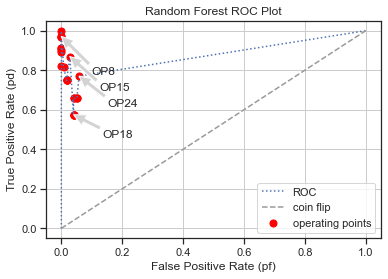

In [22]:
#displaying ROC curve for Random Forest
#using code from Module 4 notebook

# function for displaying specific operating point
def annot(opi, x, y):
    plt.annotate(f"OP{opi}", xy=(x, y), xytext=(.90*x+.1, .80*y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Sorting points to display on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotating certain operating points
annot(24, fpr[24], tpr[24])
annot(18, fpr[18], tpr[18])
annot(15, fpr[15], tpr[15])
annot(8, fpr[8], tpr[8])

# plotting ROC and labels
plt.title('Random Forest ROC Plot')
plt.xlabel('False Positive Rate (pf)')
plt.ylabel('True Positive Rate (pd)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Logistic Regression

In [23]:
#hyperparameter tuning for Logistic Regression
#using code from Module 4 notebook

# Parameter to vary for Logistic Regression
C = (0.001, 0.00140, 0.00150, 0.00180, 0.00200, 0.0100, 10, 100)

# Varying c and generating training/testing sessions to collect data for ROC
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=0,
                                               penalty='l1',
                                               solver='liblinear',
                                               class_weight='balanced',
                                               C=c,
                                               multi_class='auto',
                                               max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf
    #
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:8.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.873, C= 0.00100, TPR 0.959, FPR 0.211
Test Accuracy= 0.912, C= 0.00140, TPR 0.959, FPR 0.134
Test Accuracy= 0.967, C= 0.00150, TPR 0.959, FPR 0.024
Test Accuracy= 0.967, C= 0.00180, TPR 0.959, FPR 0.024
Test Accuracy= 0.967, C= 0.00200, TPR 0.959, FPR 0.024
Test Accuracy= 0.997, C= 0.01000, TPR 0.994, FPR 0.000
Test Accuracy= 1.000, C=10.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=100.00000, TPR 1.000, FPR 0.000


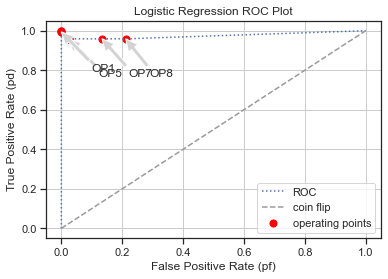

In [24]:
#displaying ROC curve for Logistic regression
#using code from Module 4 notebook

# Sorting points to display on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotating certain operating points
annot(8, fpr[8], tpr[8])
annot(7, fpr[7], tpr[7])
annot(5, fpr[5], tpr[5])
annot(1, fpr[1], tpr[1])

# plotting ROC and labels
plt.title('Logistic Regression ROC Plot')
plt.xlabel('False Positive Rate (pf)')
plt.ylabel('True Positive Rate (pd)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Decision Trees

In [25]:
#hyperparameter tuning for Decision Trees
#using code from Module 4 notebook

# Parameters to vary for decision trees
Depth = (1,3,6) #max_depth
MSF = (1,25,50,75) #mean_samples_leaf

# vary max depth and min samples leaf and generating training/testing sessions to collect data for ROC
FPR, TPR = [], []

for d in Depth:
    for m in MSF:
            pipe_dt = make_pipeline(DecisionTreeClassifier(max_depth = d, 
                                                           min_samples_leaf = m))
                                                          
            pipe_dt.fit(X_train, y_train)
            y_pred = pipe_dt.predict(X_test)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            TPR += [tp/(tp+fn)]  # Pd
            FPR += [fp/(fp+tn)]  # Pf
            #
            print(f'Test Accuracy= {pipe_dt.score(X_test, y_test):.3f}, max_depth={d:9.5f}, '
                  f'min_samples_leaf = {m:9.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.873, max_depth=  1.00000, min_samples_leaf =   1.00000, TPR 0.959, FPR 0.211
Test Accuracy= 0.873, max_depth=  1.00000, min_samples_leaf =  25.00000, TPR 0.959, FPR 0.211
Test Accuracy= 0.873, max_depth=  1.00000, min_samples_leaf =  50.00000, TPR 0.959, FPR 0.211
Test Accuracy= 0.873, max_depth=  1.00000, min_samples_leaf =  75.00000, TPR 0.959, FPR 0.211
Test Accuracy= 0.985, max_depth=  3.00000, min_samples_leaf =   1.00000, TPR 0.998, FPR 0.027
Test Accuracy= 0.978, max_depth=  3.00000, min_samples_leaf =  25.00000, TPR 0.983, FPR 0.027
Test Accuracy= 0.974, max_depth=  3.00000, min_samples_leaf =  50.00000, TPR 0.971, FPR 0.024
Test Accuracy= 0.960, max_depth=  3.00000, min_samples_leaf =  75.00000, TPR 0.944, FPR 0.024
Test Accuracy= 1.000, max_depth=  6.00000, min_samples_leaf =   1.00000, TPR 1.000, FPR 0.000
Test Accuracy= 0.990, max_depth=  6.00000, min_samples_leaf =  25.00000, TPR 0.983, FPR 0.002
Test Accuracy= 0.991, max_depth=  6.00000, min_samples_leaf 

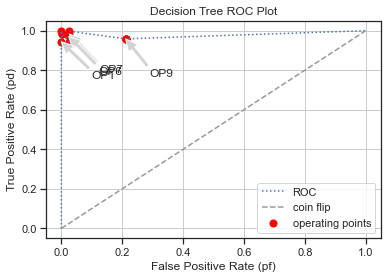

In [26]:
#displaying ROC curve for Decision Tree
#using code from Module 4 notebook

# Sorting points to display on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotating certain operating points
annot(9, fpr[9], tpr[9])
annot(7, fpr[7], tpr[7])
annot(6, fpr[6], tpr[6])
annot(1, fpr[1], tpr[1])

# plotting ROC and labels
plt.title('Decision Tree ROC Plot')
plt.xlabel('False Positive Rate (pf)')
plt.ylabel('True Positive Rate (pd)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Neural Networks

In [27]:
#hyperparameter tuning for Neural Networks
#using code from Module 4 notebook

from sklearn.neural_network import MLPClassifier

# Parameters to vary for neural networks
HLayers = (1,2,5,10,50,100)
#Epochs = (10,50,100)
#LR = [0.01,0.1,0.2,0.3]

# varying hidden layer size and generating training/testing sessions to collect data for ROC
FPR, TPR = [], []

for h in HLayers:
            pipe_nn = make_pipeline(StandardScaler(),
                                MLPClassifier(random_state = 15, hidden_layer_sizes = (h,)))
                                                           
            pipe_nn.fit(X_train, y_train)
            y_pred = pipe_nn.predict(X_test)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            TPR += [tp/(tp+fn)]  # Pd
            FPR += [fp/(fp+tn)]  # Pf
            #
            print(f'Test Accuracy= {pipe_nn.score(X_test, y_test):.3f}, hidden_layer_sizes={h:9.5f}, '
              f'TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.952, hidden_layer_sizes=  1.00000, TPR 0.903, FPR 0.000
Test Accuracy= 0.993, hidden_layer_sizes=  2.00000, TPR 0.999, FPR 0.012
Test Accuracy= 0.996, hidden_layer_sizes=  5.00000, TPR 1.000, FPR 0.009
Test Accuracy= 1.000, hidden_layer_sizes= 10.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, hidden_layer_sizes= 50.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, hidden_layer_sizes=100.00000, TPR 1.000, FPR 0.000


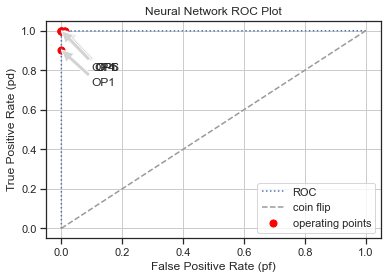

In [30]:
#displaying ROC curve for Neural Networks
#using code from Module 4 notebook

# Sorting points to display on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotating certain operating points
annot(6, fpr[6], tpr[6])
annot(5, fpr[5], tpr[5])
annot(4, fpr[4], tpr[4])
annot(1, fpr[1], tpr[1])

# plotting ROC and labels
plt.title('Neural Network ROC Plot')
plt.xlabel('False Positive Rate (pf)')
plt.ylabel('True Positive Rate (pd)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Problem 2
*What kind of behavior would you expect to see in Pd – Pf interaction of an ROC plot? Do you see it in yours?*

The ROC plots the False Postitive Rate or Pf vs the True Postive Rate or Pd fr various thresholds.  It summarizes all of the confusion matricies that each threshold produced and makes it easier to identify the best threshold which overall can help fine tune and evaluate classification models. Generally, a model has a better Pd and Pf the more the ROC curve hugs the y-axis and top border of the ROC plot.  The closer the the curve is to the coin-flip diagonal, the model has less Pd and Pf.  I expected most of the ROC curves to look more like the example in the Module 4 notebook, where the curve didn't didn't completely hug a Pf of 0 and Pd of 1.  I thought each classifier would have had noticably different ROC plots.  However, most of my plots look almost identical. It's possible that the dataset was made up of variables that can very easily distinguish between edible and poisonous mushrooms causing all the plots to look similar.  


## Problem 3
*From the ROC plot that you created make a selection of the classifier and hyperparameter setting for this problem. Note that we are classifying mushrooms so your conclusion might be subjective but has to be supported by your findings.*

Based on the ROC plots above, I found it difficult to distinguish what classifier and hyperparameters were best since most produced very similar results. Since we are classifying between edible and poisonous mushrooms, I believe it is more important to have a higher true positive rate.  It would be more dangerous to incorrectly classify a poisonous mushroom as edible compared to classifiying an edible mushroom as poisonous.  When comparing the various classifiers, I think it would be important to choose a classifier that appears to have more predictable behavior when we fine tune the hyperparameters.  Based on that criteria, I would choose the Logistic Regression classifier at a C value of 100.  Based on the output and ROC curve, it's apparent that the Pf decreases and the TPR increases as the value of C increases.  For the Random Forest classifier, I wasn't able to determine exactly, how the curve reacted to the hyperparameter changes.  It is possible, I should have used only one or two parameters rather than 3.  For neural networks, regardless of changes in parameters(hidden layer size), the accuracy, pf, and pd remained fairly consistent.  For Decision Tree, I was thinking that the highest depth and min_sample_leaf would produce the best results, however, a max_depth of 6 and min_sample_leaf of 75 reduced the TPR and accuracy. 

## References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
https://www.tutorialspoint.com/python/python_continue_statement.htm
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
https://towardsdatascience.com/demystifying-roc-curves-df809474529a
https://towardsdatascience.com/model-parameters-and-hyperparameters-in-machine-learning-what-is-the-difference-702d30970f6
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn
https://medium.com/analytics-vidhya/mushroom-classification-using-different-classifiers-aa338c1cd0ff